In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
import plotly.express as px

In [2]:
# Create random samples
norm_a = np.random.normal(loc = 3, scale = 1, size = 25)
norm_b = np.random.normal(loc = 0.05, scale = 1, size = 500)
norm_c = np.random.normal(loc = 3, scale = 1, size = 500)
f_a = np.random.f(dfnum = 5, dfden  = 10, size = 500)

In [3]:
norm_a.sort()
norm_b.sort()
norm_c.sort()
f_a.sort()

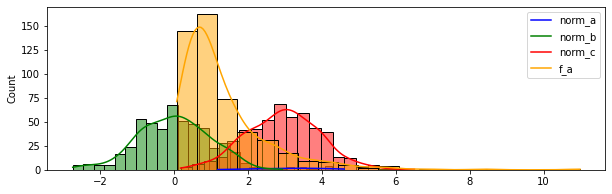

In [4]:
plt.figure(figsize = (10,3))
sns.histplot(norm_a, bins = 20, kde = True, color = 'b')
sns.histplot(norm_b, bins = 20, kde = True, color = 'g')
sns.histplot(norm_c, bins = 20, kde = True, color = 'r')
sns.histplot(f_a, bins = 20, kde = True, color = 'orange')
plt.legend(["norm_a", "norm_b", "norm_c", "f_a"])

In [5]:
def cdf(sample, x, sort = False):
    '''
    Return the value of the Cumulative Distribution Function, evaluated for a given sample and a value x.
    
    Args:
        sample: The list or array of observations.
        x: The value for which the numerical cdf is evaluated.
    
    Returns:
        cdf = CDF_{sample}(x)
    '''
    
    # Sorts the sample, if needed
    if sort:
        sample.sort()
    
    # Counts how many observations are below x
    cdf = sum(sample <= x)
    
    # Divides by the total number of observations
    cdf = cdf / len(sample)
    
    return cdf

def ecdf(xdata):
    xdataecdf = np.sort(xdata)
    ydataecdf = np.arange(1, len(xdata) + 1) / len(xdata)
    return xdataecdf, ydataecdf

In [6]:
# Creates their CDFs for visualization
cdf_norm_a = np.array([cdf(norm_a, x, sort = True) for x in norm_a])
cdf_norm_b = np.array([cdf(norm_b, x, sort = True) for x in norm_b])
cdf_norm_c = np.array([cdf(norm_c, x, sort = True) for x in norm_c])
cdf_f_a = np.array([cdf(f_a, x, sort = True) for x in f_a])

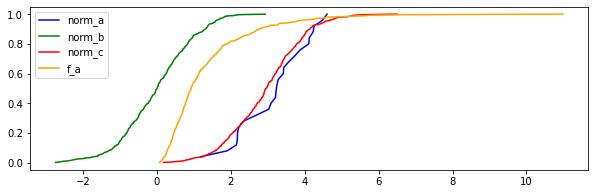

In [7]:
# Visualize them
plt.figure(figsize = (10,3))
sns.lineplot(x = norm_a, y = cdf_norm_a, color = 'b')
sns.lineplot(x = norm_b, y = cdf_norm_b, color = 'g')
sns.lineplot(x = norm_c, y = cdf_norm_c, color = 'r')
sns.lineplot(x = f_a, y = cdf_f_a, color = 'orange')
plt.legend(["norm_a", "norm_b", "norm_c", "f_a"])

In [8]:
norm_d = np.random.normal(loc = 3.1, scale = 1.2, size = 25)
norm_d.sort()
cdf_norm_d = np.array([cdf(norm_d, x, sort = True) for x in norm_d])

Text(0.5, 1.0, 'Kolmogorov-Smirnov Statistic')

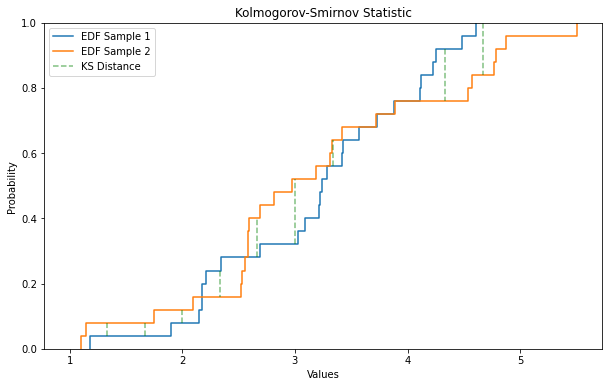

In [11]:
plt.figure(figsize = (10,6))
# sns.lineplot(x = norm_a, y = cdf_norm_a)
# sns.lineplot(x = norm_d, y = cdf_norm_d)
# sns.lineplot(x = a_x, y = a_y)
# sns.lineplot(x = d_x, y = d_y)
p = sns.ecdfplot(norm_a)
p.set( xlabel = "Values", ylabel = "Probability")
p = sns.ecdfplot(norm_d)
p.set( xlabel = "Values", ylabel = "Probability")
min_x = int(min(min(norm_a), min(norm_d)))
max_x = int(max(max(norm_a), max(norm_d)))
for i in range(min_x * 3, max_x * 3):
    j = i/3
    plt.plot([j, j], [cdf(norm_a, j), cdf(norm_d, j)], color = 'g', alpha=0.5, linestyle='dashed')
plt.legend(["EDF Sample 1", "EDF Sample 2", "KS Distance"])
plt.title("Kolmogorov-Smirnov Statistic")